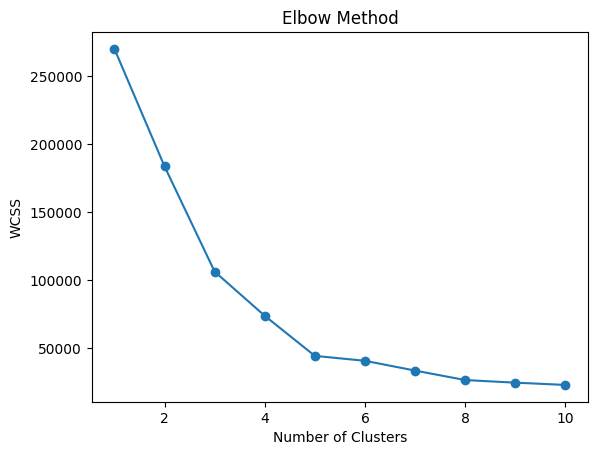

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
5        2  
6        4  
7        2  
8        4  
9        2  


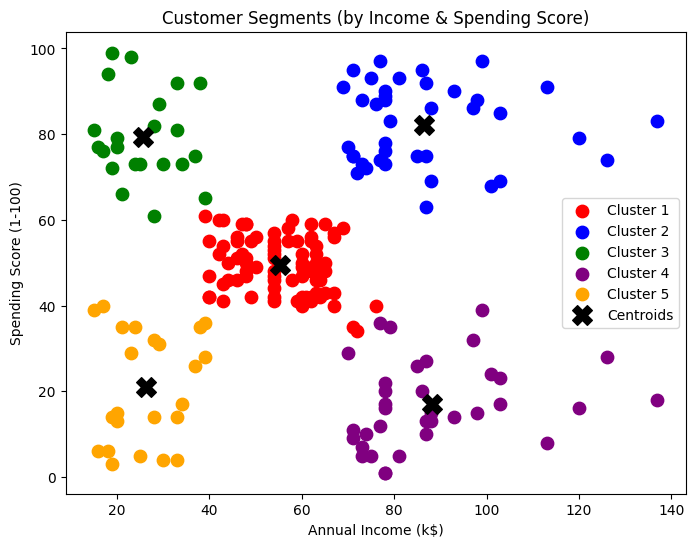

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df=pd.read_csv("Mall_Customers.csv")
x=df[["Annual Income (k$)","Spending Score (1-100)"]]
#KMEANS CLUSTERING
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#DETERMINE NUMBER OF CLUSTERS
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

df["Cluster"] = y_kmeans

print(df.head(10))

#VISUALIZATION OF CLUSTERS
plt.figure(figsize=(8,6))
plt.scatter(x.values[y_kmeans == 0, 0], x.values[y_kmeans == 0, 1], s=80, c='red', label='Cluster 1')
plt.scatter(x.values[y_kmeans == 1, 0], x.values[y_kmeans == 1, 1], s=80, c='blue', label='Cluster 2')
plt.scatter(x.values[y_kmeans == 2, 0], x.values[y_kmeans == 2, 1], s=80, c='green', label='Cluster 3')
plt.scatter(x.values[y_kmeans == 3, 0], x.values[y_kmeans == 3, 1], s=80, c='purple', label='Cluster 4')
plt.scatter(x.values[y_kmeans == 4, 0], x.values[y_kmeans == 4, 1], s=80, c='orange', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title("Customer Segments (by Income & Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()